In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
from google.colab import files
data=files.upload()

Saving WorldBank Renewable Energy Consumption_WorldBank Renewable Energy Consumption (1).csv to WorldBank Renewable Energy Consumption_WorldBank Renewable Energy Consumption (1) (2).csv


In [80]:
Energy=pd.read_csv('WorldBank Renewable Energy Consumption_WorldBank Renewable Energy Consumption (1).csv')

**EXPLORATORY DATA ANALYSIS(EDA)**

In [81]:
Energy.head()

,Country Code,Country Name,Income Group,Indicator Code,Indicator Name,Region,Year,Energy Consump.
0,ABW,Aruba,High income,EG.FEC.RNEW.ZS,Renewable energy consumption (% of total final...,Latin America & Caribbean,1/1/1990,0.268747
1,AFG,Afghanistan,Low income,EG.FEC.RNEW.ZS,Renewable energy consumption (% of total final...,South Asia,1/1/1990,15.924532
2,AGO,Angola,Lower middle income,EG.FEC.RNEW.ZS,Renewable energy consumption (% of total final...,Sub-Saharan Africa,1/1/1990,72.255252
3,ALB,Albania,Upper middle income,EG.FEC.RNEW.ZS,Renewable energy consumption (% of total final...,Europe & Central Asia,1/1/1990,25.518088
4,AND,Andorra,High income,EG.FEC.RNEW.ZS,Renewable energy consumption (% of total final...,Europe & Central Asia,1/1/1990,14.273550


In [82]:
Energy.describe()

,Energy Consump.
count,6071.000000
mean,30.467386
std,30.688168
min,0.000000
25%,3.272610
50%,18.901600
75%,52.666149
max,98.342903


In [83]:
Energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6071 entries, 0 to 6070
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Code     6071 non-null   object 
 1   Country Name     6071 non-null   object 
 2   Income Group     6071 non-null   object 
 3   Indicator Code   6071 non-null   object 
 4   Indicator Name   6071 non-null   object 
 5   Region           6071 non-null   object 
 6   Year             6071 non-null   object 
 7   Energy Consump.  6071 non-null   float64
dtypes: float64(1), object(7)
memory usage: 379.6+ KB


In [84]:
#check for null values
Energy.isnull().sum()

Country Code       0
Country Name       0
Income Group       0
Indicator Code     0
Indicator Name     0
Region             0
Year               0
Energy Consump.    0
dtype: int64

In [85]:
#checking for duplicates
Energy.duplicated().sum()

0

In [86]:
#def check_outliers(Energy, Energy_Consump):
    #sns.boxplot(x=Energy[Energy_Consump])
   # plt.show()

In [87]:
Energy['Region'].unique()

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

In [88]:
Energy['Income Group'].unique()

array(['High income', 'Low income', 'Lower middle income',
       'Upper middle income'], dtype=object)

In [89]:
categorical_columns=[]
noncategorical_columns=[]

for column in Energy.columns:
  if Energy[column].dtype=='object':
    categorical_columns.append(column)
  else:
      noncategorical_columns.append(column)

print('categorical columns')
print(categorical_columns)
print('\n noncategorical columns')
print(noncategorical_columns)

categorical columns
['Country Code', 'Country Name', 'Income Group', 'Indicator Code', 'Indicator Name', 'Region', 'Year']

 noncategorical columns
['Energy Consump.']


**VISUALIZATION**

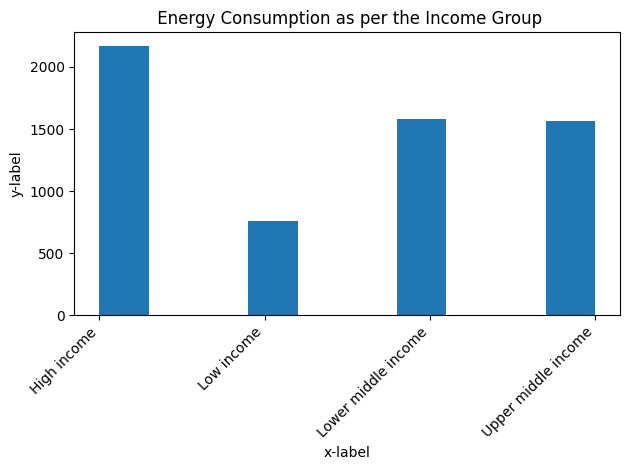

In [90]:
plt.hist(Energy['Income Group'])
plt.xlabel('x-label')
plt.ylabel('y-label')
plt.title(' Energy Consumption as per the Income Group')
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align to the right
plt.tight_layout()## Adjust layout to prevent labels from overlapping
plt.show()

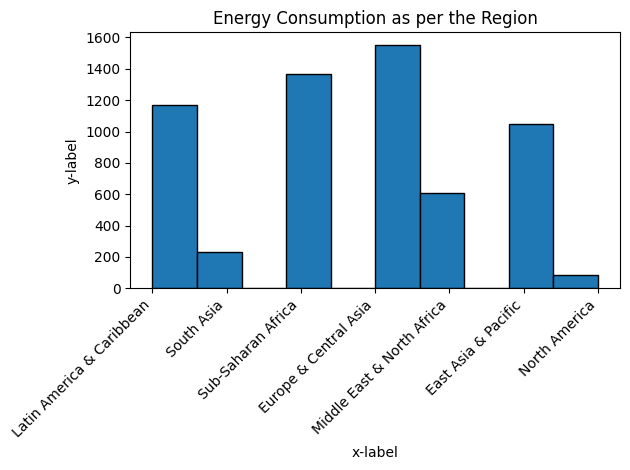

In [91]:
plt.hist(Energy['Region'],edgecolor='black')
plt.xlabel('x-label')
plt.ylabel('y-label')
plt.title('Energy Consumption as per the Region')
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align to the right
plt.tight_layout()## Adjust layout to prevent labels from overlapping
plt.show()

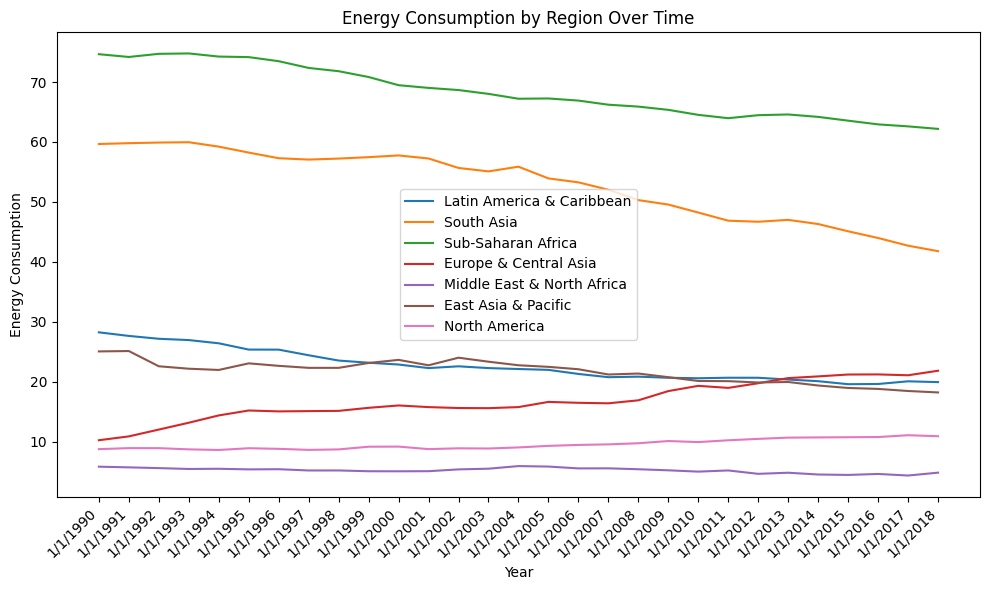

In [92]:
plt.figure(figsize=(10, 6))

for Region in Energy['Region'].unique():
    plt.plot(Energy[Energy['Region'] == Region].groupby('Year')['Energy Consump.'].mean(), label=Region)

plt.xlabel('Year')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption by Region Over Time')
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align to the right
plt.tight_layout()## Adjust layout to prevent labels from overlapping
plt.legend()
plt.show()

**FEATURE ENGINEERING**

In [93]:
from sklearn import preprocessing#import the necessary tools for encoding
le = preprocessing.LabelEncoder()

In [94]:
Energy['Country Name'] = le.fit_transform(Energy['Country Name'])

Energy['Country Code'] = le.fit_transform(Energy['Country Code'])

Energy['Income Group'] = le.fit_transform(Energy['Income Group'])

Energy['Indicator Code'] = le.fit_transform(Energy['Indicator Code'])

Energy['Indicator Name'] = le.fit_transform(Energy['Indicator Name'])

Energy['Region'] = le.fit_transform(Energy['Region'])

In [95]:
Energy.head()

,Country Code,Country Name,Income Group,Indicator Code,Indicator Name,Region,Year,Energy Consump.
0,0,9,0,0,0,2,1/1/1990,0.268747
1,1,0,1,0,0,5,1/1/1990,15.924532
2,2,5,2,0,0,6,1/1/1990,72.255252
3,3,1,3,0,0,1,1/1/1990,25.518088
4,4,4,0,0,0,1,1/1/1990,14.273550


In [96]:
# Convert 'Year' column to datetime
#Energy['Year'] = pd.to_datetime(Energy['Year'])

In [97]:
#importing the necessary libraries to train and test the model.
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import OrdinalEncoder # Import OrdinalEncoder

In [98]:
if 'Year' in Energy.columns:
    # Create an OrdinalEncoder object
    ordinal_encoder = OrdinalEncoder()

    # Fit and transform the 'Year' column
    Energy['Year_encoded'] = ordinal_encoder.fit_transform(Energy[['Year']])

    # Drop the original 'Year' column
    Energy = Energy.drop('Year', axis=1)

In [99]:
Energy.tail()

,Country Code,Country Name,Income Group,Indicator Code,Indicator Name,Region,Energy Consump.,Year_encoded
6066,74,58,3,0,0,6,4.9047,28.0
6067,66,68,3,0,0,6,89.8871,28.0
6068,133,124,3,0,0,6,9.1989,28.0
6069,136,133,3,0,0,6,30.3270,28.0
6070,210,173,3,0,0,6,10.3433,28.0


In [100]:
#Training and testing the model
x = Energy.drop('Energy Consump.',axis=1)
y = Energy['Energy Consump.']

In [101]:
#Training and testing the model

x_train,x_test,y_train,y_test = train_test_split(x, y,test_size = 0.2,random_state = 42)

In [102]:
#Giving a variable name to our model(defining the model)
Energy_model=DecisionTreeRegressor()

In [103]:
Energy_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [104]:
y_pred = Energy_model.predict(x_test)  # predicting the outcome

r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")

R-squared score: 0.9937136703011549
